In [1]:
pip install -U scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
df = pd.read_csv('Pasion et al dataset.csv', sep=',', header=0)
df.head()

,Location,Date,Time,Latitude,Longitude,Altitude,YRMODAHRMI,Month,Hour,Season,Humidity,AmbientTemp,PolyPwr,Wind.Speed,Visibility,Pressure,Cloud.Ceiling
0,Camp Murray,20171203,1145,47.11,-122.57,84,2.017120e+11,12,11,Winter,81.71997,12.86919,2.42769,5,10.0,1010.6,722
1,Camp Murray,20171203,1315,47.11,-122.57,84,2.017120e+11,12,13,Winter,96.64917,9.66415,2.46273,0,10.0,1011.3,23
2,Camp Murray,20171203,1330,47.11,-122.57,84,2.017120e+11,12,13,Winter,93.61572,15.44983,4.46836,5,10.0,1011.6,32
3,Camp Murray,20171204,1230,47.11,-122.57,84,2.017120e+11,12,12,Winter,77.21558,10.36659,1.65364,5,2.0,1024.4,6
4,Camp Murray,20171204,1415,47.11,-122.57,84,2.017120e+11,12,14,Winter,54.80347,16.85471,6.57939,3,3.0,1023.7,9


In [4]:
df.describe()

,Date,Time,Latitude,Longitude,Altitude,YRMODAHRMI,Month,Hour,Humidity,AmbientTemp,PolyPwr,Wind.Speed,Visibility,Pressure,Cloud.Ceiling
count,2.104500e+04,21045.000000,21045.000000,21045.000000,21045.000000,2.104500e+04,21045.000000,21045.000000,21045.000000,21045.000000,21045.000000,21045.000000,21045.000000,21045.000000,21045.000000
mean,2.017720e+07,1267.483725,38.213823,-108.593678,798.843668,2.017718e+11,6.565883,12.627845,37.121941,29.285117,12.978583,10.318318,9.700071,925.944747,515.966785
std,4.579585e+03,167.602767,6.323761,16.364130,770.681794,4.579846e+07,2.983958,1.672952,23.823011,12.366820,7.123255,6.385030,1.351949,85.215659,301.903379
min,2.017052e+07,1000.000000,20.890000,-156.440000,1.000000,2.017050e+11,1.000000,10.000000,0.000000,-19.981770,0.257330,0.000000,0.000000,781.700000,0.000000
25%,2.017111e+07,1100.000000,38.160000,-117.260000,2.000000,2.017110e+11,4.000000,11.000000,17.529300,21.915280,6.404570,6.000000,10.000000,845.500000,140.000000
50%,2.018032e+07,1300.000000,38.950000,-111.180000,458.000000,2.018030e+11,7.000000,13.000000,33.123780,30.289150,13.798700,9.000000,10.000000,961.100000,722.000000
75%,2.018062e+07,1400.000000,41.150000,-104.710000,1370.000000,2.018060e+11,9.000000,14.000000,52.593990,37.474670,18.863650,14.000000,10.000000,1008.900000,722.000000
max,2.018100e+07,1545.000000,47.520000,-80.110000,1947.000000,2.018100e+11,12.000000,15.000000,99.987790,65.738370,34.285020,49.000000,10.000000,1029.500000,722.000000


## Understanding the dataset 

In [5]:
print(df.dtypes)

Location          object
Date               int64
Time               int64
Latitude         float64
Longitude        float64
Altitude           int64
YRMODAHRMI       float64
Month              int64
Hour               int64
Season            object
Humidity         float64
AmbientTemp      float64
PolyPwr          float64
Wind.Speed         int64
Visibility       float64
Pressure         float64
Cloud.Ceiling      int64
dtype: object


In [6]:
# Missing Value Check
df.isnull().sum()

Location         0
Date             0
Time             0
Latitude         0
Longitude        0
Altitude         0
YRMODAHRMI       0
Month            0
Hour             0
Season           0
Humidity         0
AmbientTemp      0
PolyPwr          0
Wind.Speed       0
Visibility       0
Pressure         0
Cloud.Ceiling    0
dtype: int64

<AxesSubplot:>

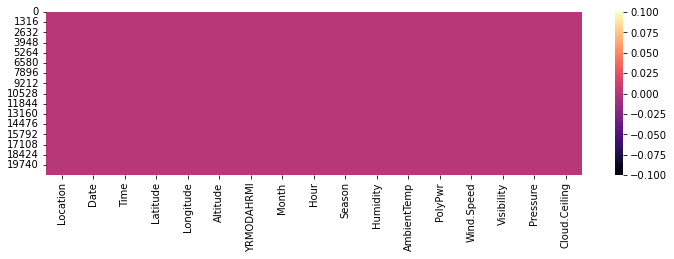

In [7]:
# Missing Value Check - Visualized
plt.figure(figsize=(12,3))
sns.heatmap(df.isnull(), cmap="magma")

In [8]:
df['Date_Transform'] = pd.to_datetime(df['Date'], format='%Y%m%d')

In [9]:
df.describe()

# Some insights to note:
# Observation times are only between 10 AM and 3:45 PM
# Dates (Month/Day/Year) are not considered as good input variables for the model

,Date,Time,Latitude,Longitude,Altitude,YRMODAHRMI,Month,Hour,Humidity,AmbientTemp,PolyPwr,Wind.Speed,Visibility,Pressure,Cloud.Ceiling
count,2.104500e+04,21045.000000,21045.000000,21045.000000,21045.000000,2.104500e+04,21045.000000,21045.000000,21045.000000,21045.000000,21045.000000,21045.000000,21045.000000,21045.000000,21045.000000
mean,2.017720e+07,1267.483725,38.213823,-108.593678,798.843668,2.017718e+11,6.565883,12.627845,37.121941,29.285117,12.978583,10.318318,9.700071,925.944747,515.966785
std,4.579585e+03,167.602767,6.323761,16.364130,770.681794,4.579846e+07,2.983958,1.672952,23.823011,12.366820,7.123255,6.385030,1.351949,85.215659,301.903379
min,2.017052e+07,1000.000000,20.890000,-156.440000,1.000000,2.017050e+11,1.000000,10.000000,0.000000,-19.981770,0.257330,0.000000,0.000000,781.700000,0.000000
25%,2.017111e+07,1100.000000,38.160000,-117.260000,2.000000,2.017110e+11,4.000000,11.000000,17.529300,21.915280,6.404570,6.000000,10.000000,845.500000,140.000000
50%,2.018032e+07,1300.000000,38.950000,-111.180000,458.000000,2.018030e+11,7.000000,13.000000,33.123780,30.289150,13.798700,9.000000,10.000000,961.100000,722.000000
75%,2.018062e+07,1400.000000,41.150000,-104.710000,1370.000000,2.018060e+11,9.000000,14.000000,52.593990,37.474670,18.863650,14.000000,10.000000,1008.900000,722.000000
max,2.018100e+07,1545.000000,47.520000,-80.110000,1947.000000,2.018100e+11,12.000000,15.000000,99.987790,65.738370,34.285020,49.000000,10.000000,1029.500000,722.000000


<AxesSubplot:xlabel='Date_Transform', ylabel='Count'>

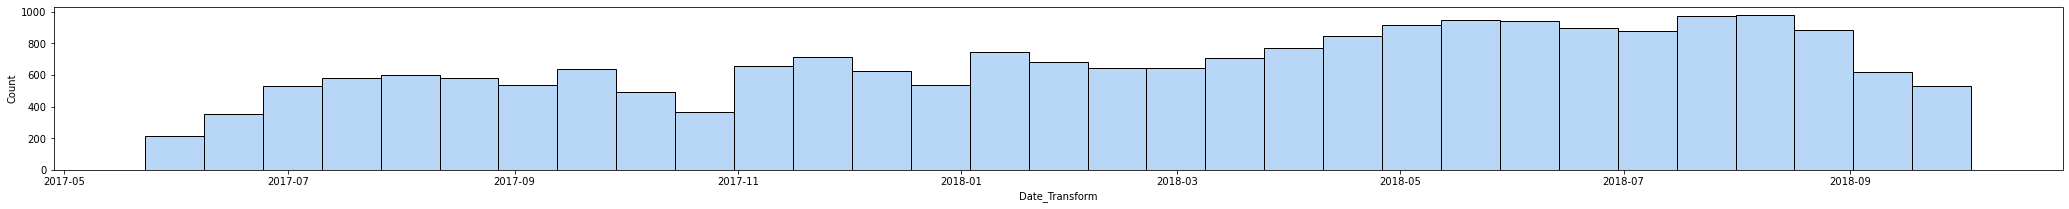

In [10]:
# Distribution of data across observation dates
plt.figure(figsize=(36,3))
sns.set_palette("pastel")
sns.histplot(x='Date_Transform', stat='count', data=df)

<AxesSubplot:xlabel='Time', ylabel='Count'>

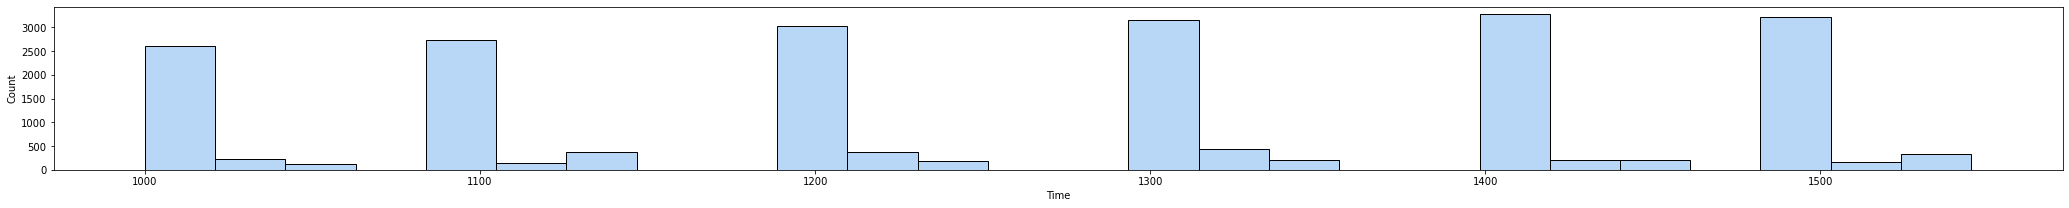

In [11]:
# Distribution of data across 15-min intervals, regardless of dates
plt.figure(figsize=(36,3))
sns.histplot(x='Time', stat='count', data=df)

In [12]:
df['Time'].nunique() # Total count of 15-min time intervals in the dataset

24

<AxesSubplot:xlabel='Season', ylabel='Count'>

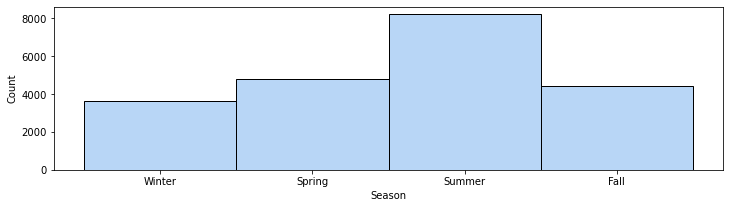

In [13]:
# Distribution of data across seasons, regardless of year
plt.figure(figsize=(12,3))
sns.histplot(x='Season', stat='count', data=df)

<AxesSubplot:xlabel='Location', ylabel='Count'>

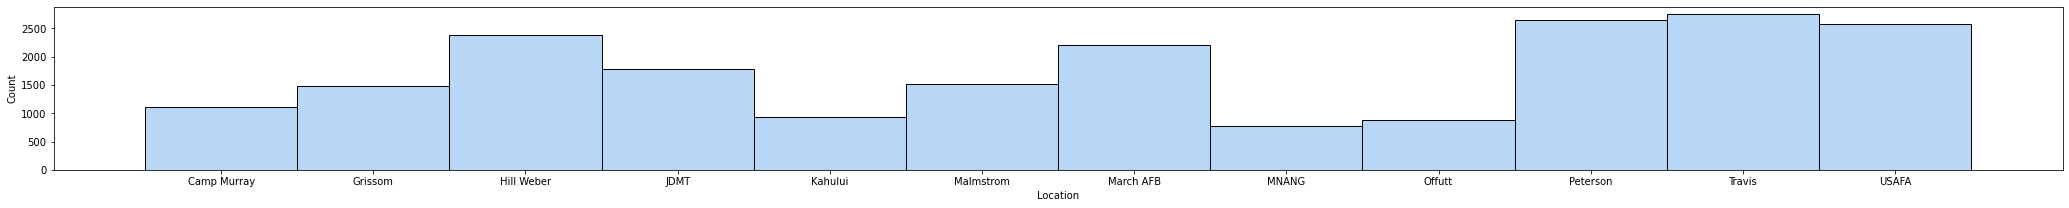

In [14]:
# Distribution of data across power generation sites
plt.figure(figsize=(36,3))
sns.histplot(x='Location', stat='count', data=df)

### Feature Elimination of Variables

In [15]:
df = df.drop(columns=['Date', 'Time', 'YRMODAHRMI', 'Date_Transform'])
# These time variables are either redundant or unnecessary.
# Exact dates and exact times carry no meaning on their own, unlike other inputs such as humidity, temp, etc.

In [16]:
df = df.drop('Location', axis=1)
# Site identification has no meaning to the prediction models, but its latitude and longitude could possibly be used as inputs.

In [17]:
df.head()

,Latitude,Longitude,Altitude,Month,Hour,Season,Humidity,AmbientTemp,PolyPwr,Wind.Speed,Visibility,Pressure,Cloud.Ceiling
0,47.11,-122.57,84,12,11,Winter,81.71997,12.86919,2.42769,5,10.0,1010.6,722
1,47.11,-122.57,84,12,13,Winter,96.64917,9.66415,2.46273,0,10.0,1011.3,23
2,47.11,-122.57,84,12,13,Winter,93.61572,15.44983,4.46836,5,10.0,1011.6,32
3,47.11,-122.57,84,12,12,Winter,77.21558,10.36659,1.65364,5,2.0,1024.4,6
4,47.11,-122.57,84,12,14,Winter,54.80347,16.85471,6.57939,3,3.0,1023.7,9


In [18]:
# Low Variance Check
df.var().apply(lambda x: '%.3f' % x)
# Only the categorical variables have extremely low variance, so we will not eliminate any features by their variance.

C:\Users\ana.abesamis\AppData\Local\Temp\ipykernel_16720\1778086645.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.var().apply(lambda x: '%.3f' % x)


Latitude             39.990
Longitude           267.785
Altitude         593950.428
Month                 8.904
Hour                  2.799
Humidity            567.536
AmbientTemp         152.938
PolyPwr              50.741
Wind.Speed           40.769
Visibility            1.828
Pressure           7261.708
Cloud.Ceiling     91145.650
dtype: object

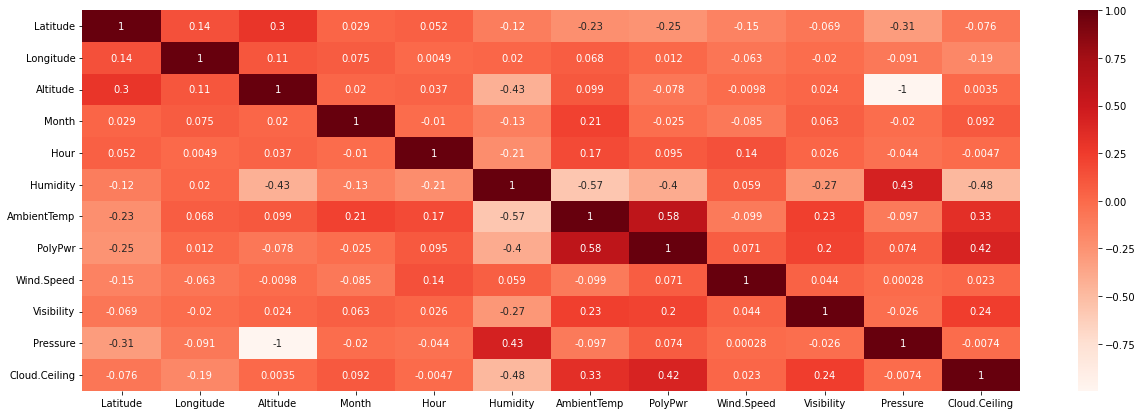

In [19]:
# Correlation Check
cor = df.corr()
plt.figure(figsize=(21,7))
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()
# Altitude and Pressure have perfect correlation. We will drop Altitude because it does not change for a given site.

In [20]:
df = df.drop('Altitude', axis=1)

### Dummy Encoding 

In [21]:
df['Season'] = df['Season'].astype('category')
dummies = pd.get_dummies(df.Season)
df = df.drop(columns='Season').merge(dummies,left_index=True, right_index=True)
df.head()

,Latitude,Longitude,Month,Hour,Humidity,AmbientTemp,PolyPwr,Wind.Speed,Visibility,Pressure,Cloud.Ceiling,Fall,Spring,Summer,Winter
0,47.11,-122.57,12,11,81.71997,12.86919,2.42769,5,10.0,1010.6,722,0,0,0,1
1,47.11,-122.57,12,13,96.64917,9.66415,2.46273,0,10.0,1011.3,23,0,0,0,1
2,47.11,-122.57,12,13,93.61572,15.44983,4.46836,5,10.0,1011.6,32,0,0,0,1
3,47.11,-122.57,12,12,77.21558,10.36659,1.65364,5,2.0,1024.4,6,0,0,0,1
4,47.11,-122.57,12,14,54.80347,16.85471,6.57939,3,3.0,1023.7,9,0,0,0,1


### Normality Check

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

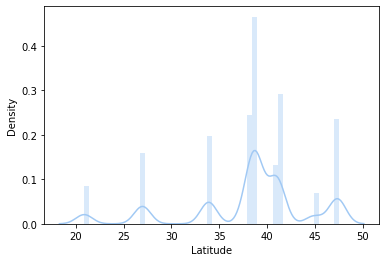

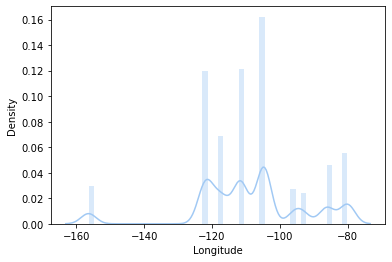

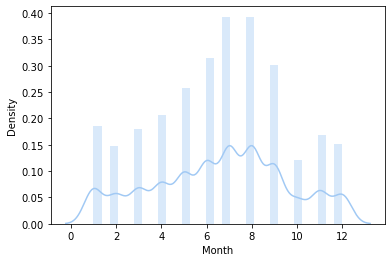

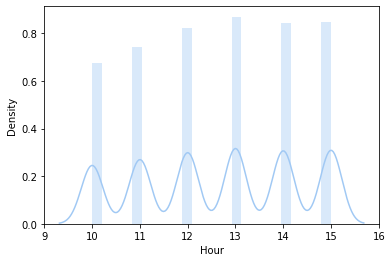

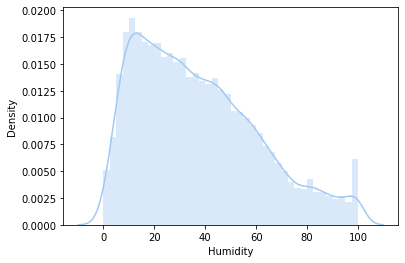

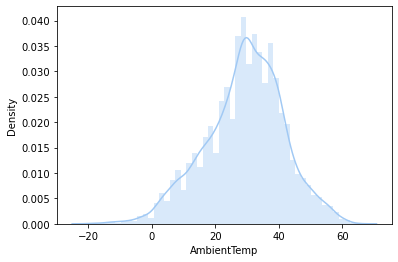

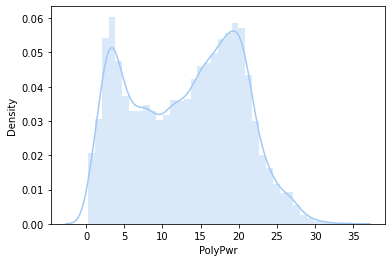

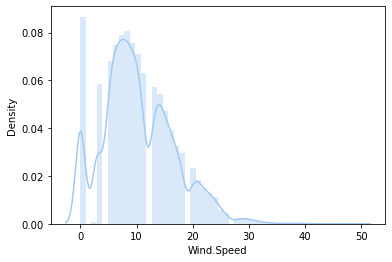

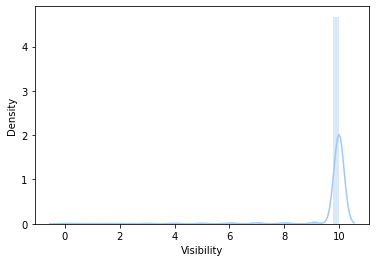

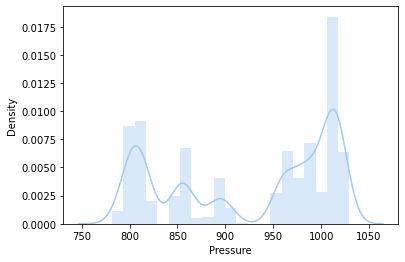

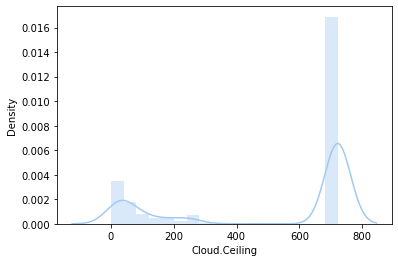

In [22]:
df_num = df.drop(df.loc[:, 'Fall':'Winter'].columns, axis=1)
for column in df_num.columns:
    plt.figure()
    sns.distplot(df_num[column])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PolyPwr', ylabel='Density'>

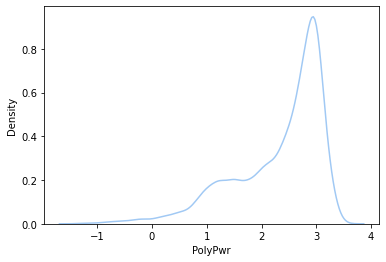

In [23]:
# Transforming Target Variable into Normal Distribution
df['PolyPwr'] = np.log(df['PolyPwr'])
sns.distplot(df['PolyPwr'], hist=False, kde=True)

## Processed Data

In [24]:
# Download csv file
df.to_csv('clean_dataset.csv')

In [25]:
clean_df = df

In [26]:
clean_df.head()

,Latitude,Longitude,Month,Hour,Humidity,AmbientTemp,PolyPwr,Wind.Speed,Visibility,Pressure,Cloud.Ceiling,Fall,Spring,Summer,Winter
0,47.11,-122.57,12,11,81.71997,12.86919,0.886940,5,10.0,1010.6,722,0,0,0,1
1,47.11,-122.57,12,13,96.64917,9.66415,0.901270,0,10.0,1011.3,23,0,0,0,1
2,47.11,-122.57,12,13,93.61572,15.44983,1.497021,5,10.0,1011.6,32,0,0,0,1
3,47.11,-122.57,12,12,77.21558,10.36659,0.502979,5,2.0,1024.4,6,0,0,0,1
4,47.11,-122.57,12,14,54.80347,16.85471,1.883942,3,3.0,1023.7,9,0,0,0,1


In [27]:
clean_df.dtypes

Latitude         float64
Longitude        float64
Month              int64
Hour               int64
Humidity         float64
AmbientTemp      float64
PolyPwr          float64
Wind.Speed         int64
Visibility       float64
Pressure         float64
Cloud.Ceiling      int64
Fall               uint8
Spring             uint8
Summer             uint8
Winter             uint8
dtype: object

In [28]:
clean_df.describe()

,Latitude,Longitude,Month,Hour,Humidity,AmbientTemp,PolyPwr,Wind.Speed,Visibility,Pressure,Cloud.Ceiling,Fall,Spring,Summer,Winter
count,21045.000000,21045.000000,21045.000000,21045.000000,21045.000000,21045.000000,21045.000000,21045.000000,21045.000000,21045.000000,21045.000000,21045.000000,21045.000000,21045.000000,21045.000000
mean,38.213823,-108.593678,6.565883,12.627845,37.121941,29.285117,2.321574,10.318318,9.700071,925.944747,515.966785,0.209408,0.228463,0.390021,0.172107
std,6.323761,16.364130,2.983958,1.672952,23.823011,12.366820,0.813325,6.385030,1.351949,85.215659,301.903379,0.406896,0.419852,0.487766,0.377483
min,20.890000,-156.440000,1.000000,10.000000,0.000000,-19.981770,-1.357396,0.000000,0.000000,781.700000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,38.160000,-117.260000,4.000000,11.000000,17.529300,21.915280,1.857012,6.000000,10.000000,845.500000,140.000000,0.000000,0.000000,0.000000,0.000000
50%,38.950000,-111.180000,7.000000,13.000000,33.123780,30.289150,2.624574,9.000000,10.000000,961.100000,722.000000,0.000000,0.000000,0.000000,0.000000
75%,41.150000,-104.710000,9.000000,14.000000,52.593990,37.474670,2.937237,14.000000,10.000000,1008.900000,722.000000,0.000000,0.000000,1.000000,0.000000
max,47.520000,-80.110000,12.000000,15.000000,99.987790,65.738370,3.534709,49.000000,10.000000,1029.500000,722.000000,1.000000,1.000000,1.000000,1.000000
